# **Обучение и оценка модели Logistic Regression**

Цель этой части - применить метод логистической регрессии для анализа кредитного риска на основе ранее подготовленного и предобработанного датасета.

В рамках работы необходимо:



1. обучить базовую модель Logistic Regression;
2. оценить качество классификации с использованием метрик accuracy, precision, recall и F1-score;
3. проанализировать влияние признаков на вероятность дефолта через коэффициенты модели;
4. визуализировать важность признаков и интерпретировать полученные результаты.

Данная часть демонстрирует, как логистическая регрессия может использоваться в качестве базовой модели для оценки кредитного риска, позволяет определить ключевые факторы, влияющие на вероятность невозврата займа, и может использоваться как основа для дальнейшего сравнения с более сложными моделями.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
df = pd.read_csv("credit_risk_preprocessed.csv")

print("\nDataset shape: ", df.shape, "\n")

print("First 10 rows of the dataset:")
print(tabulate(df.head(10), headers='keys', tablefmt='pretty', showindex=False))


Dataset shape:  (32581, 23) 

First 10 rows of the dataset:
+---------------------+---------------------+---------------------+---------------------+---------------------+-------------+---------------------+----------------------------+-----------------------------+---------------------------+----------------------------+-----------------------+-----------------------------+---------------------+----------------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+-----------------------------+
|     person_age      |    person_income    |  person_emp_length  |      loan_amnt      |    loan_int_rate    | loan_status | loan_percent_income | cb_person_cred_hist_length | person_home_ownership_OTHER | person_home_ownership_OWN | person_home_ownership_RENT | loan_intent_EDUCATION | loan_intent_HOMEIMPROVEMENT | loan_intent_MEDICAL | loan_intent_PERSONAL | loan_intent_VENTURE | loan_grade_B | loan_grade_C | loan_grade_D | loan

In [5]:
y = df['loan_status']
X = df.drop(columns=['loan_status'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (26064, 22)
Test size: (6517, 22)


In [6]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

print("\nDetailed classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.868
Precision: 0.768
Recall: 0.564
F1-score: 0.650

Detailed classification report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.56      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.78      6517
weighted avg       0.86      0.87      0.86      6517



**Вывод по модели:** модель Logistic Regression достаточно хорошо различает клиентов с низким и высоким риском (Accuracy: 0.87), но немного хуже выявляет заемщиков, склонных к дефолту (Recall: 0.57).

In [8]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
importance.insert(0, '#', range(1, len(importance) + 1))

print("\nTop 10 Influential features (increase default probability):")
print(tabulate(importance.head(10), headers='keys', tablefmt='pretty', showindex=False, floatfmt=".4f"))

print("\nLeast 10 influential features (decrease default probability):")
print(tabulate(importance.tail(10), headers='keys', tablefmt='pretty', showindex=False, floatfmt=".4f"))


Top 10 Influential features (increase default probability):
+----+-----------------------------+---------------------+
| #  |           Feature           |     Coefficient     |
+----+-----------------------------+---------------------+
| 1  |        loan_grade_G         |  4.325126591615372  |
| 2  |        loan_grade_F         | 2.9304108616591567  |
| 3  |        loan_grade_E         | 2.5924695538330687  |
| 4  |        loan_grade_D         |  2.42359735125486   |
| 5  |     loan_percent_income     |  1.390557729428824  |
| 6  | person_home_ownership_RENT  | 0.8576625990668062  |
| 7  | person_home_ownership_OTHER | 0.4928108219753959  |
| 8  |        loan_grade_C         | 0.3058930377514392  |
| 9  |        loan_int_rate        | 0.21867927783829072 |
| 10 |        loan_grade_B         | 0.1744473113296625  |
+----+-----------------------------+---------------------+

Least 10 influential features (decrease default probability):
+----+----------------------------+---------------

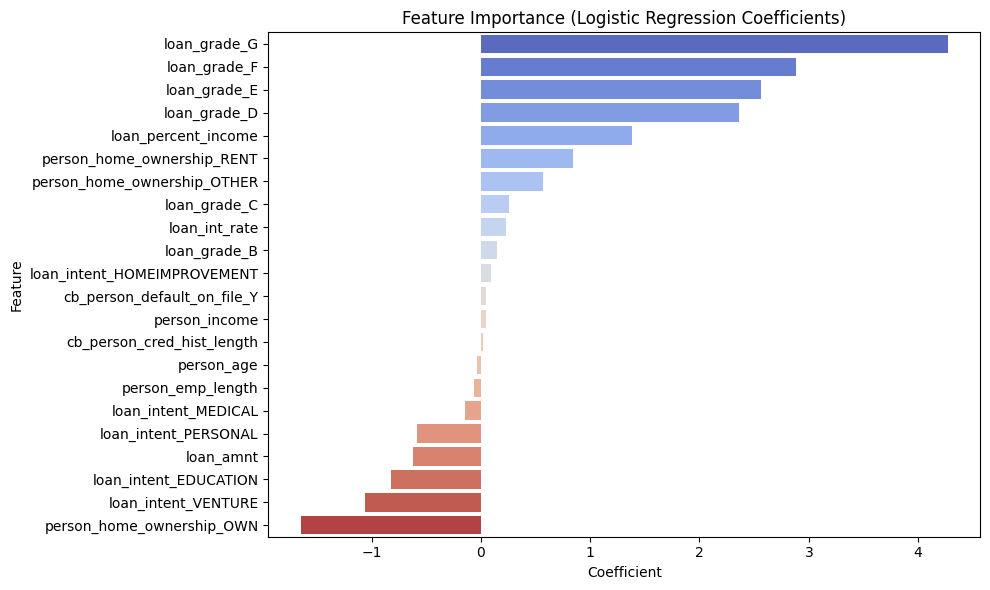

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=importance, x='Coefficient', y='Feature', hue='Feature', palette='coolwarm', legend=False)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()


1. **Признаки, увеличивающие вероятность дефолта:**


* `loan_grade_G, F, E, D` - чем хуже класс кредита, тем выше риск дефолта.
* `loan_percent_income` - чем больше часть дохода уходит на выплату кредита, тем выше вероятность невозврата.
* `person_home_ownership_RENT` - арендаторы чаще допускают просрочки по сравнению с владельцами жилья.
* `loan_int_rate` - более высокие процентные ставки связаны с повышенным риском.


2. **Признаки, снижающие вероятность дефолта:**

* `person_home_ownership_OWN` - владение жильем связано с более низким риском.
* `loan_intent_EDUCATION / VENTURE / PERSONAL` - такие цели кредита реже приводят к дефолту.
*  `person_income` - более высокий доход снижает вероятность невозврата.





**Общий вывод:**
Модель Logistic Regression показала ключевые факторы, влияющие на вероятность дефолта, такие как класс кредита, доля кредита от дохода и тип владения жильем.

Хотя модель не всегда точно находит всех заемщиков с высоким риском (Recall = 0.57), она хорошо работает в целом (Accuracy = 0.87) и может быть использована как основа для дальнейших улучшений или для объяснения решений модели в кредитном скоринге.

In [ ]:
import joblib

joblib.dump(log_reg, "credit_risk_logreg_model.pkl")
print("Logistic Regression model has been saved as 'credit_risk_logreg_model.pkl'")


Logistic Regression model has been saved as 'credit_risk_logreg_model.pkl'
